In [102]:
import cv2 
import PIL
import matplotlib.pyplot as plt 
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import os
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [90]:
#Splitting the dataset containing Weed-4class-33-labels into training and testing
dataset=pd.read_csv('/Users/vatsavkolluru/Desktop/Data Mining Assignmemt/Weed-4class-33-labels.csv')
train, test = train_test_split(dataset, test_size = 0.2, stratify=dataset[["Label"]]) 


dataset_folder = "/Users/vatsavkolluru/Desktop/Data Mining Assignmemt/Weed-4class-33"


#Converting the training images(non-negative class) into pixel intensity histograms
folders = train['Filename']
images = []
image_shapes = []
hsitr_train=[]
for folder in folders:
#     print(folder,"folder anme")
    image_path = os.path.join(dataset_folder, folder)
#     print(image_path)
    if image_path!="/Users/vatsavkolluru/Desktop/Data Mining Assignmemt/Weed-4class-33/.DS_Store":
        
        image = cv2.imread(image_path)
        # Convert to RGB as OpenCV uses BGR
        gray_images=(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)) 
        images.append(gray_images)
        hsitr_train.append(cv2.calcHist([images[-1]],[0],None,[256],[0,256]))



In [ ]:
#Converting the testing images(non-negative class) into pixel intensity histograms
folders_test = test['Filename']
images_test = []
hsitr_test=[]
for folder in folders_test:
    image_path = os.path.join(dataset_folder, folder)
    if image_path!="/Users/vatsavkolluru/Desktop/Data Mining Assignmemt/Weed-4class-33/.DS_Store":
        
        image = cv2.imread(image_path)
        # Convert to RGB as OpenCV uses BGR
        gray_images=(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)) 
        images_test.append(gray_images)
        hsitr_test.append(cv2.calcHist([images_test[-1]],[0],None,[256],[0,256]))

In [91]:
len(hsitr_train)

3381

In [127]:
#Converting the training(negative class) images into pixel intensity histograms

In [92]:
#Splitting the data into training and tesing with stratified split to ensure no bias in classes
dataset_1=pd.read_csv('/Users/vatsavkolluru/Desktop/Data Mining Assignmemt/Negatives.csv')
train1, test1=train_test_split(dataset_1, test_size = 0.2, stratify=dataset_1[["Label"]]) 

In [93]:
dataset_folder_1="/Users/vatsavkolluru/Desktop/Data Mining Assignmemt/Negatives"
folders1=train1['Filename']
for folder in folders1:
#     print(folder,"folder anme")
    image_path = os.path.join(dataset_folder_1, folder)
#     print(image_path)
    if image_path!="/Users/vatsavkolluru/Desktop/Data Mining Assignmemt/Weed-4class-33/.DS_Store":
        
        image = cv2.imread(image_path)
        # Convert to RGB as OpenCV uses BGR
        gray_images=(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)) 
        images.append(gray_images)
        hsitr_train.append(cv2.calcHist([images[-1]],[0],None,[256],[0,256]))

In [ ]:
#Converting the testing(negative class) images into pixel intensity histograms

In [94]:
folders_test1 = test1['Filename']
for folder in folders_test1:
#     print(folder,"folder anme")
    
    image_path = os.path.join(dataset_folder_2, folder)
#     if folder=="20171109-071623-1.jpg":
#         print("here")
#         print(image_path)
# #     if folder=="20170729-085707-2.jpg":
# #         print(image_path)
    image = cv2.imread(image_path)
    # Convert to RGB as OpenCV uses BGR
    gray_images=(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)) 
    images_test.append(gray_images)
    hsitr_test.append(cv2.calcHist([images_test[-1]],[0],None,[256],[0,256]))

In [95]:
train=pd.concat([train, train1])

In [96]:
test=pd.concat([test, test1])

In [ ]:
#Below, it can be verified if all classes have been divided in the ratio 80:20 for training to testing respectively

In [128]:
train['Label'].value_counts()

8    7284
0     900
4     849
2     825
5     807
Name: Label, dtype: int64

In [129]:
test['Label'].value_counts()

8    1822
0     225
4     213
2     206
5     202
Name: Label, dtype: int64

In [114]:
X_train=hsitr_train
y_train=train['Label']
X_train=np.array(X_train)
X_train=X_train.reshape(10665, 256)

In [115]:
X_test=hsitr_test
y_test=test['Label']
X_test=np.array(X_test)
X_test=X_test.reshape(2668, 256)

In [116]:
X_train.shape

(10665, 256)

# k-fold cross validation for knn

In [118]:

scores=[]
validation_accuracy=[]

for n in [1,3,5,7]:
    # use the same model as before
    knn = KNeighborsClassifier(n_neighbors = n)
    cross_validation_score=cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
#     print(cross_validation_score, "cross_validation_score")
    validation_accuracy.append(sum(cross_validation_score)/5)

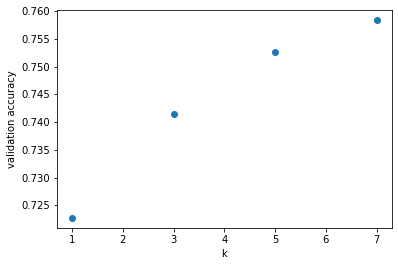

In [130]:
plt.xlabel("k")
plt.ylabel("validation accuracy")
plt.scatter([1,3,5,7], validation_accuracy)

In [120]:
validation_accuracy

[0.7227379278012189,
 0.7414908579465542,
 0.7526488513830286,
 0.7583684950773558]

In [121]:
#clearly, we can see that best validation accuracy occurs at k=7 and accuracy% is 75.8%

# Test accuracy for best k(k=7)

In [ ]:
"""
References: -https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
"""

In [131]:
knn_best = KNeighborsClassifier(n_neighbors = 7)

In [132]:
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [133]:
# get the predict value from X_test
y_pred = knn_best.predict(X_test)

In [134]:
# print the score
print('test accuracy: ', knn_best.score(X_test, y_test))

test accuracy:  0.7706146926536732
